 ---
 # Prática 4: Análisis en el dominio de la frecuencia(DF) del circuito serie de segundo orden R-L-C.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [643]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
Pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093

In [644]:
xlsx_name="P4_guion_hojaCalculoParaMedidas.ods" #Importamos el fichero que contiene los datos.

In [645]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Funcioón que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100

---
<h1 style="text-align: center;">[P4.C0]</h1>

---

Definimos el valor de $\omega_0$ como $\omega_0\ =\ \dfrac{1}{\sqrt{L\ C}}$.


Definimos el valor de $u$ como $u\ =\ \dfrac{\omega}{\omega_0}$.


El valor de $\delta$ como $\delta\ =\ \dfrac{R}{2}\ \sqrt{\dfrac{C}{L}}$.

___

---


Expresiones de la funcion transferencia, con su modulo y argumento.
##### Funcion transferencia del Condensador: 
$\~T_C(u) = \dfrac{1}{(1-u^2) + j2\delta u}$
##### Modulo del Condensador: 
$\lvert \~T_C(u) \rvert = \dfrac{1}{\sqrt{(1-u^2)^2 + (2\delta u)^2}}$
##### Fase del Condensador: 
$\text{Arg}(\~T_C(u)) = -\arctan\left(\dfrac{2\delta u}{1-u^2}\right)$

___

---
##### Funcion transferencia de la Resistencia: 
$\~T_R(u) = \dfrac{j2\delta u}{(1-u^2) + j2\delta u}$
##### Modulo de la Resistencia: 
$\lvert \~T_R(u) \rvert = \dfrac{2\delta u}{\sqrt{(1-u^2)^2 + (2\delta u)^2}}$
##### Fase de la Resistencia: 
$\text{Arg}(\~T_R(u)) = \dfrac{\pi}{2} - \arctan\left(\dfrac{2\delta u}{1-u^2}\right)$

---
<h1 style="text-align: center;">[P4.C1]</h1>

---


In [646]:
DatosParteC1 = pd.read_excel(xlsx_name,sheet_name="C1")

# Extraemos los valores:

ValoresTeoricos = DatosParteC1["Valor nominal"].tolist()
ValoresPracticos = DatosParteC1["Valor medido"].tolist()


# Tras tener los valores tanto teóricos como prácticos extraemos de la lista los valores de la resistencia, capacidad e inducción.

ResistenciaTeo = ValoresTeoricos[0]
ResistenciaPra = ValoresPracticos[0]

# Le añadimos la resistencia de la fuente.

ResistenciaPra = ResistenciaPra + 50
ResistenciaTeo = ResistenciaTeo + 50


CapacidadTeo = ValoresTeoricos[1]
CapacidadPra = ValoresPracticos[1]

# Cambiamos la unidades del Condesador

CapacidadTeo = CapacidadTeo*1e-9
CapacidadPra = CapacidadPra*1e-9

InductanciaTeo = ValoresTeoricos[2]
InductanciaPra = ValoresPracticos[2]

# Cambiamos la unidades de la Bobina

InductanciaTeo = InductanciaTeo*1e-3
InductanciaPra = InductanciaPra*1e-3

# Calculo de la Frecuencia de Resonancia teórica

FrecuenciaResonanciaTeo = 1/(math.sqrt(CapacidadTeo*InductanciaTeo))
FactorAmortiguadorTeo = (ResistenciaTeo/2)*(math.sqrt((CapacidadTeo/InductanciaTeo)))

# Calculo de la Frecuencia de Resonancia experimental

FrecuenciaResonanciaPra = 1/(math.sqrt(CapacidadPra*InductanciaPra))

print(f'La frecuencia de resonancia teórica es: {round(FrecuenciaResonanciaTeo,2)} rad/s.Equivalentemente son a {round(FrecuenciaResonanciaTeo/(2*Pi),2)} Hz.')
print(f'La frecuencia de resonancia practica es: {round(FrecuenciaResonanciaPra,2)} rad/s.Equivalentemente son a {round(FrecuenciaResonanciaPra/(2*Pi),2)} Hz.')



La frecuencia de resonancia teórica es: 145864.99 rad/s.Equivalentemente son a 23215.13 Hz.
La frecuencia de resonancia practica es: 147381.57 rad/s.Equivalentemente son a 23456.51 Hz.


---
<h1 style="text-align: center;">[P4.C2]</h1>

---

In [647]:
DatosParteC2 = pd.read_excel(xlsx_name,sheet_name="C2")

# Extraemos los valores:
FrecuenciaResonanciaC2 = DatosParteC2["fresonancia"].tolist()




---
<h1 style="text-align: center;">[P4.C3]</h1>

---


En este apartado haremos el diagrama de Bode de la funcion transferencia de la Resistencia, tanto teoricamente como de manera experimental.

El modulo experiemtal ha sido calculado dividiendo el voltaje de entrada entre el voltaje medido en la resistencia, la fase experimental ha sido calculada tal y como se explica en el apendice del guión, haciendo la siguiente operación: $\Delta\phi\ =\ arcsin(\dfrac{a}{b}).$

El modulo teórico ha sido calculado usando las ecuaciones expuestas en P4C0.

In [648]:
# Recogemos los datos del excel.

DatosParteC3 = pd.read_excel(xlsx_name,sheet_name='C3',usecols='A:E')

Frecuencia = DatosParteC3["f(kHz)"].tolist()
VoltajeFuente = DatosParteC3["Ve(V)"].tolist()
VoltajeResist = DatosParteC3["VR(V)"].tolist()
ValorA = DatosParteC3["a"].tolist()
ValorB = DatosParteC3["b"].tolist()

In [649]:
# Definimos las listas que usaremos para el diagrama de Bode.

FrecuenciaAnguTeo = [] #Lista que guardara la Frecuencia Angular que usaremos para representa los diagrmas de Bode
FrecuenciaAnguPra = []
FrecuenciaResonanciaAngularRes = []
FrecuenciaResonanciaAngularCond = []

# Las listas de abajo guardaran los valores que representan (modulo o fase), ya bien sean teóricos o experiemntales.

ModuloTRPrac = []
ModuloTCPrac = []
ModuloTLPrac = []

ModuloTRTeo = []
ModuloTCTeo = []
ModuloTLTeo = []

FaseTRPrac = []
FaseTCPrac = []
FaseTLPrac = []

FaseTRTeo = []
FaseTCTeo = []
FaseTLTeo = []

In [650]:
# Convertimos las listas en arrays
Frecuencia,ValorA,ValorB = ConverArray3(Frecuencia,ValorA,ValorB)
VoltajeFuente,VoltajeResist = ConverArray2(VoltajeFuente,VoltajeResist)


# Definimos la frecuencia angular como:
FrecuenciaAnguPra = Frecuencia.copy()*(2*Pi*1000)
FrecuenciaAnguTeo = FrecuenciaAnguPra.copy() #TEMPORAL ARREGALR

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases teóricos.
#----------------------------------------------------------------------------------------------------------------------------------

# Definimos "u" como w/w0.
u = 0
for i in FrecuenciaAnguTeo:
    i = float(i)
    u = i/FrecuenciaResonanciaTeo
    FrecuenciaResonanciaAngularRes.append(u)
    # Calculo de los Modulos

    ModuloTRTeo.append((2*u*FactorAmortiguadorTeo)/(math.sqrt(((1-u**2)**2) + (2*FactorAmortiguadorTeo*u)**2)))
    ModuloTLTeo.append((u**2)/(math.sqrt(((1-u**2)**2) + (2*FactorAmortiguadorTeo*u)**2)))
    # Calculo de las Fases

    FaseTRTeo.append((Pi/2) - math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    FaseTLTeo.append(Pi - math.atan((2*FactorAmortiguadorTeo*u)/(1-u**2)))

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases prácticos.
#----------------------------------------------------------------------------------------------------------------------------------


j = 0
for i in VoltajeFuente:
    # Calculo de los modulos
    ModuloTRPrac.append(VoltajeResist[j]/i)
    j += 1
    
# El valor de la fase se calcula como se expresa en P4C0
j = 0
for i in ValorA:
    i = float(i)# Cambiamos los valores a float para que math pueda hacer el calculo.
    k = float(ValorB[j])
    # Calculamos la fase.
    FaseTRPrac.append(math.asin(i/k))
    j += 1

print(f"{ModuloTRPrac}.\n{ModuloTRTeo}")

[0.30313588850174217, 0.35000000000000003, 0.4340277777777778, 0.5258620689655172, 0.6397058823529411, 0.6916666666666667, 0.7208333333333333, 0.7675438596491229, 0.9158415841584159, 0.9880952380952381, 0.9, 0.7727272727272726, 0.6818181818181818, 0.5528089887640449, 0.5303370786516853, 0.48888888888888893, 0.40879120879120884, 0.3032967032967033].
[0.32416711883779736, 0.39579101295287844, 0.47608033986608544, 0.5944928985168936, 0.7261844773214783, 0.7710645223628207, 0.8076458540098677, 0.8499219653221788, 0.9689774635482671, 0.999427798095197, 0.9325747811355736, 0.8234219208821563, 0.7237672949352236, 0.5886301049493937, 0.5676199294535893, 0.5306199500126709, 0.4422669399052719, 0.3310777409315029]


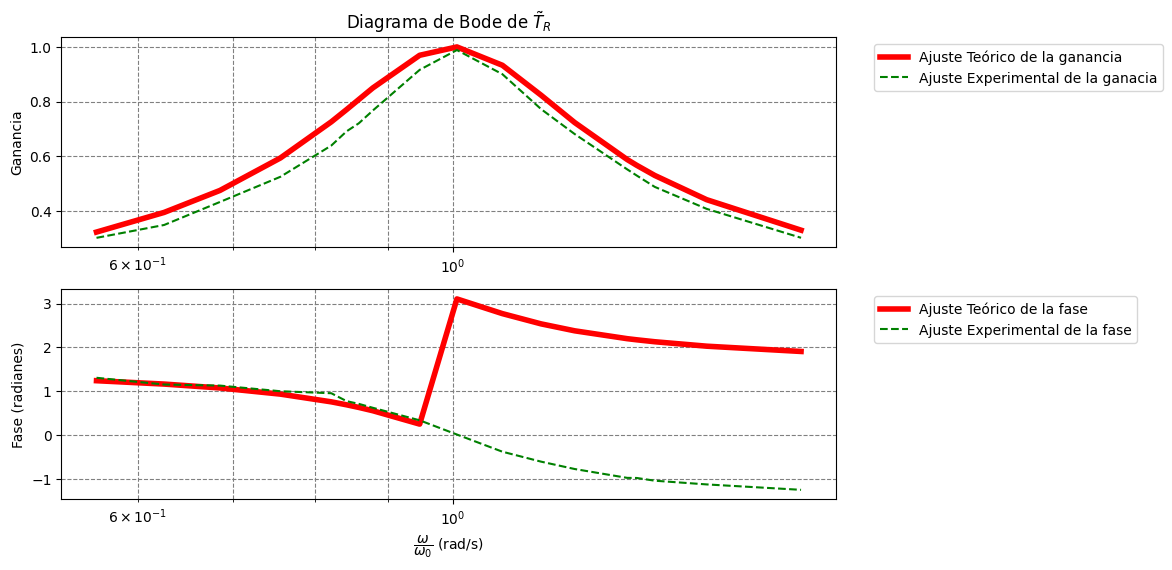

In [651]:
# Representamos los diagramas de Bode.

#----------------------------------------------------------------
# Teórico
#----------------------------------------------------------------

GananciaTeoR = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTRTeo:
    GananciaTeoR.append(abs(i))

#----------------------------------------------------------------
# Práctico
#----------------------------------------------------------------

GananciaPracR = []# Este lista tomara el valor de la ganancia práctica
for i in ModuloTRPrac:
    GananciaPracR.append(abs(i))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
#plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c\ Teo$ = {1/RCteo:.2f} rad/s")
#plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
#plt.axvline(1/RCexp, color='black', linestyle=':', label=fr"$\omega_{{c}}\ Exp$ = {1/RCexp:.2f} rad/s")
#plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="black", fontsize=12, ha="left",va='baseline')
plt.semilogx(FrecuenciaResonanciaAngularRes, GananciaTeoR,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularRes, GananciaPracR,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T}_R$")
plt.ylabel("Ganancia")
#plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")



# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaResonanciaAngularRes, FaseTRTeo,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularRes, FaseTRPrac,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()

---
<h1 style="text-align: center;">[P4.C4]</h1>

---



In [652]:
DatosParteC4 = pd.read_excel(xlsx_name,sheet_name='C4',usecols='A:E')
# Recogemos los datos del excel.

FrecuenciaCond = DatosParteC4["f(kHz)"].tolist()
VoltajeFuente2 = DatosParteC4["Ve(V)"].tolist()
VoltajeConden = DatosParteC4["VC(V)"].tolist()
ValorA = DatosParteC4["a"].tolist()
ValorB = DatosParteC4["b"].tolist()

In [653]:
# Convertimos las listas en arrays
FrecuenciaCond,ValorA,ValorB = ConverArray3(Frecuencia,ValorA,ValorB)
VoltajeFuente2,VoltajeConden = ConverArray2(VoltajeFuente,VoltajeResist)

# Definimos la frecuencia angular como:
FrecuenciaAnguPra = FrecuenciaCond.copy()*(2*Pi*1000)
FrecuenciaAnguTeo = FrecuenciaAnguPra #TEMPORAL ARREGALR

In [654]:
# Definimos "u" como w/w0.
u = 0
for i in FrecuenciaAnguTeo:
    i = float(i)
    u = i/FrecuenciaResonanciaTeo
    FrecuenciaResonanciaAngularCond.append(u)
    # Calculo de los Modulos

    ModuloTCTeo.append(1/(math.sqrt((1-(u**2))**2 + (2*FactorAmortiguadorTeo*u)**2)))
    # Calculo de las Fases

    FaseTCTeo.append(-math.atan((2*FactorAmortiguadorTeo*u)/(1-u**2)))

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases prácticos.
#----------------------------------------------------------------------------------------------------------------------------------


j = 0
for i in VoltajeFuente2:
    # Calculo del modulo
    ModuloTCPrac.append(VoltajeConden[j]/i)
    j += 1
j = 0
for i in ValorA:
    i = float(i)
    k = float(ValorB[j])
    # Calculamos la fase.
    FaseTCPrac.append(math.asin(i/k))
    j += 1

ValueError: x and y must have same first dimension, but have shapes (18,) and (16,)

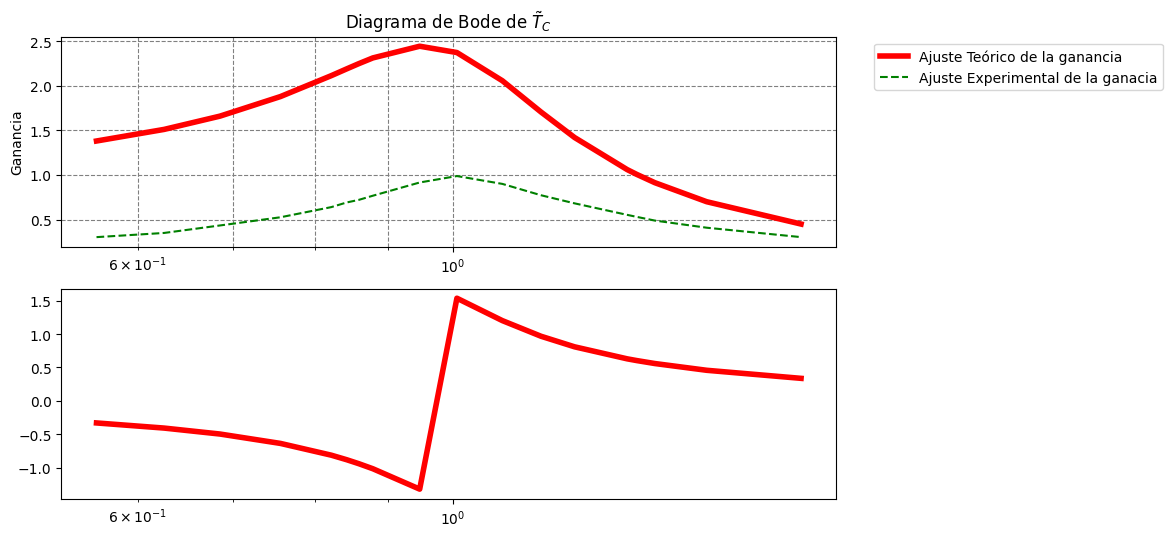

In [655]:
# Representamos los diagramas de Bode.

#----------------------------------------------------------------
# Teórico
#----------------------------------------------------------------

GananciaTeoC = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTCTeo:
    GananciaTeoC.append(abs(i))

#----------------------------------------------------------------
# Práctico
#----------------------------------------------------------------

GananciaPracC = []# Este lista tomara el valor de la ganancia práctica
for i in ModuloTCPrac:
    GananciaPracC.append(abs(i))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
#plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c\ Teo$ = {1/RCteo:.2f} rad/s")
#plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
#plt.axvline(1/RCexp, color='black', linestyle=':', label=fr"$\omega_{{c}}\ Exp$ = {1/RCexp:.2f} rad/s")
#plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="black", fontsize=12, ha="left",va='baseline')
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaTeoC,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaPracC,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T}_C$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCTeo,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCPrac,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()